<a href="https://colab.research.google.com/github/mehreen89/DataSets/blob/main/HW1_University_Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University Admission Prediction

  In this exercise the goal is to predict weather a student can enter his/her desired university or not.

  The data set, as you will see, contains the information of 400 students with 9 attributes(columns) including Serial number of each students(our we can say each sample),
the [Graduate Record Examinations (GRE)](https://en.wikipedia.org/wiki/Graduate_Record_Examinations),
the [Test of English as a Foreign Language (TOEFL)](https://en.wikipedia.org/wiki/Test_of_English_as_a_Foreign_Language#:~:text=The%20TOEFL%20iBT%20test%20is,to%20determine%20the%20total%20score.),
the [statement of purpose (SOP)](https://blog.nomadcredit.com/statement-purpose-explanation-international-students/),
the [Letter of Recommendation (LOR)](https://whizstorm.com/what-is-a-letter-of-recommendation),
the [Culmulative Grade Point Average(CGPA)](https://byjus.com/cbse/cgpa-calculator/)
scores, the University rating, and also weather the student has at least one research or not.

#### The purpose is to find a good reason to use Logistic Regression and discuss about the downsides of it with respect to how we can implement it from scratch
Lets role into the problem.

# Importing Basic Libararies

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualizing
import copy

# Importing Our Dataset

In [ ]:
dataset = pd.read_csv("../input/admission-prediction/Admission_Predict.csv")
pd.set_option('display.max_columns',len(dataset.columns))
dataset.head(5)# gives us the first five of the sample dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#Let's look at the exact columns' name
dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

I'll cut the Serial no. attribute because it's not going to affect our dataset

In [ ]:
# we are goning to seprate the class label ( Chance of Admit ) from the rest.
Y = dataset.iloc[:,-1].values
X = dataset.drop(["Serial No.","Chance of Admit "],axis=1)

# Visualizing Our Dataset

One of the most important aspect of data analyzing, is to first, have a clear vision of the dataset and finding out how we can
rescailing, regenerating(for missing values), and most importantly imabalancing them.

So lets do this step by step...

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


As we can see here, we do not have any missing values.
(the Non-Null count column)

## Description

In [ ]:
X.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


**MEAN** : with having means and take a look at the median(50%) of each attribute,we can rest assured that our dataset does not contain outliers.
*the outliers are dangarous enemies for linear regressions and logistic regression.*

But, we can not rely on these information without having a survey on the histograms.

### Histograms

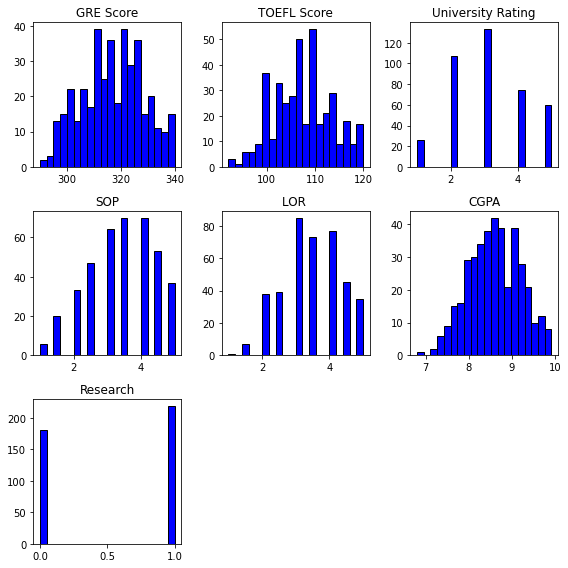

In [ ]:
columns = X.columns
fig = plt.figure(figsize=(8,8))
for i in range(0,7):

    ax = plt.subplot(3, 3, i+1)
    ax.hist(X[columns[i]],bins = 20, color = 'blue', edgecolor = 'black')

    #set title name of each
    ax.set_title(columns[i])

plt.tight_layout()
plt.show()

Histograms are a good informative plots to handle previous missunderstandings of our dataset, especially for continous varibale distribution.
for instance, at the first plot of GRE score, the mean is approximatley 316, but we have biomodal distribution. In others words there is two peaks for our samples in term of this variable. in data analyzing, this means maybe, you can devide this variable into the gender subplots of students, which can lead to so much more information.

Another view of the histograms of SOP, LOR they are skewed to the left. and the reason maybe its that for a good application you need to have a better scores at these exams.

And so musch more information that you can get from histograms to analyizng your data.

#### (if you can help to get more information from the plots abive ,i'll appriciate it:).

## Correlations

In [ ]:
X.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000


So, there are some correlations between attributes, but before we judge, lets have more clear vision of these correaltion with heatmap!!

### Heatmap

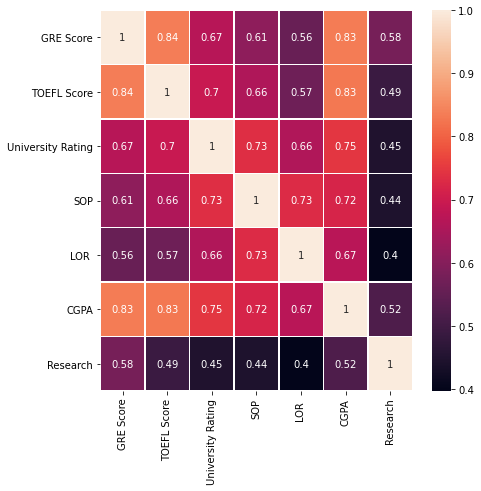

In [ ]:
import seaborn as sb # for vuisualizing
fig, ax = plt.subplots(figsize=(7,7))
sb.heatmap(X.corr(),linewidth = 0.5,annot=True)

Now we can see that there is not such a high correlation to handle it or drop some of them.
because the value of each variance should at most be 1 or -1 to lead us to the conclusion of dropping the attributes that have correlation and using one of them based on our consideration of each.

But does it always work to drop the correleated attributes?

The answer is 'NO'.

The correct answer to it is laid under Multicollinearity.
But what is collinearitycollinearitycollinearitycollinearitycollinearitycollinearityremediesremediesremediespredictorpredictorpredictor or collinearity?

> "_In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy._" ___Wikipedia___

According to the definition, there is kind of a relation between two or more attributes. It can affect our model by small degree. The real problem is that, if we have prefect correlation between variables, while the model are trying to find a perfect coefficient for one independent variable to predict the dependent one, it affects the coefficient of the other one, which makes it hard to estimate the coefficients independently.

Obviously, this problem weakens the estimation of each independant variables, which leads us to not a perfect model to predict our dependant variables.
But to cure this problem first you have to have a good reson for that, it's all depends on severity of the problem itself. For example if the correlation of GRE and TOEFEL is 1 or -1 then we have to solve the problem not just by dropping one of them, but by many remedies that statistically can prepare, related to Feature Engineering.

Visit [Wekipedia](https://en.wikipedia.org/wiki/Multicollinearity#:~:text=Multicollinearity%20refers%20to%20a%20situation,equal%20to%201%20or%20%E2%88%921.) for more information.

Lets dive into fitting our model!

# Seprating the train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split #spiliting
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y,test_size = 0.25,random_state = 1)

# Fitting Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression # Logistic Regression to predict
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train,Y_train)

NameError: name 'LogisticRegression' is not defined

OOPS.
What's the problem?

As you can see here the output of our dataset is continous to pass through for logistic regression which needs a label class; zero or one.


To scale these probablity-based output to 1 or 0 we have to set threshold.
for instance consider a sigmoid function:
![image.png](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image4_gw5mmv.png)
![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png)
See!! There is a curve shifting at the exact number of 0.5 of y_axis and in logistic regression usually we choose 0.5 to conclude that the all y's above the 0.5 scale to 1 and bellow this number scale to zero.
but that's not always our optimal cut off!!
in the following, first we are going to use a tricky solution and after that we are going to have a scientefic reason for how to pick our optimal threshold.

Then lets figuring out how to choose our threshold for labling and how to correct it?!

### Tricky Solution

one of a tricky solution is to estimate a range of thrsholding values:

we will now make a possible list of our threshold and using all of them to get the best answer and result in term of accuracy by fitting a linear regression model.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score # estiating the model
from sklearn.linear_model import LinearRegression # use instead of logistic reg. to get probablistic output then use threshold to scale.

# make an indivisual logistic_regression
def Logistic_Regression(X_train,X_test,Y_train,Y_test,threshold = 0.5):
    #fitting our model for current dataset
    regressor = LinearRegression()
    regressor.fit(X_train,Y_train)
    #predict
    Y_pred = regressor.predict(X_test)

    Y_test_temp = copy.deepcopy(Y_test)
    for index in range(0,len(Y_pred)):
        if Y_pred[index] >= threshold:
            Y_pred[index] = 1
        else:
            Y_pred[index] = 0
    for index2 in range(0,len(Y_test)):
        if Y_test[index2] >= threshold:
            Y_test_temp[index2] = 1
        else:
            Y_test_temp[index2] = 0
    return Y_test_temp,Y_pred

# our threshold list
threshold_list = [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    Y_test_temp,Y_pred = Logistic_Regression(X_train,X_test,Y_train,Y_test,threshold = i)

    #now we can get the accuracy for current model
    print("ACCURACY OF ",i," THRESHOLD : ",accuracy_score(Y_test_temp,Y_pred),'\n')

ACCURACY OF  0.05  THRESHOLD :  1.0 

ACCURACY OF  0.1  THRESHOLD :  1.0 

ACCURACY OF  0.15  THRESHOLD :  1.0 

ACCURACY OF  0.2  THRESHOLD :  1.0 

ACCURACY OF  0.25  THRESHOLD :  1.0 

ACCURACY OF  0.3  THRESHOLD :  1.0 

ACCURACY OF  0.35  THRESHOLD :  0.99 

ACCURACY OF  0.4  THRESHOLD :  0.98 

ACCURACY OF  0.45  THRESHOLD :  0.96 

ACCURACY OF  0.5  THRESHOLD :  0.92 

ACCURACY OF  0.55  THRESHOLD :  0.91 

ACCURACY OF  0.6  THRESHOLD :  0.9 

ACCURACY OF  0.65  THRESHOLD :  0.81 

ACCURACY OF  0.7  THRESHOLD :  0.9 

ACCURACY OF  0.75  THRESHOLD :  0.93 

ACCURACY OF  0.8  THRESHOLD :  0.94 

ACCURACY OF  0.85  THRESHOLD :  0.96 

ACCURACY OF  0.9  THRESHOLD :  0.96 

ACCURACY OF  0.95  THRESHOLD :  0.98 

ACCURACY OF  0.99  THRESHOLD :  1.0 



as we see here, we had some values but which one to pick is a challenging decision!?

The most better one doesn't always lead to better regression or model. because it can force us to over-fitting.
according to this, we can choose 0.6 or 0.7 for instance.

In [ ]:
Y_test,Y_pred = Logistic_Regression(X_train,X_test,Y_train,Y_test,threshold = 0.75)
print("ACCURACY OF ",0.75 ," THRESHOLD : ",accuracy_score(Y_test,Y_pred),'\n')

ACCURACY OF  0.75  THRESHOLD :  0.93 



In [ ]:
# now lets see the confusion matrix of it
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[53  2]
 [ 5 40]]


but if you are faced issues like this and also have a probablistc prediction with label class test set, you have to consider it with only words below:

### The optimal cut off would be where tpr is high and fpr is low. tpr - (1-fpr) is zero or near to zero is the optimal cut off point.

Regardless of what happened so far, you can use this model to predict weather you can get your "ADMISSION" from desired univerdity or not. hope you best of luck;)

Thank you so much for reading my notebook.
plaese send me feedback about my mistakes, i'll appreciate you, correct me.


# THE END.
